# Explore here

Si tengo menos de 12GB de RAM utilizo el siguiente Notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Me estaba dando problemas al tener python 3.13. tensorflow solo va (de momento) con python 3.11

In [2]:
import sys
print(sys.executable)


c:\Users\mamen\AppData\Local\Programs\Python\Python311\python.exe


In [3]:
import numpy as np
import tensorflow as tf

print(np.__version__)  # Debe ser 1.26.0 o similar
print(tf.__version__)  # Debe mostrar la versión de TensorFlow instalada


1.26.0
2.19.0


Paso 2: Visualiza la información de entrada

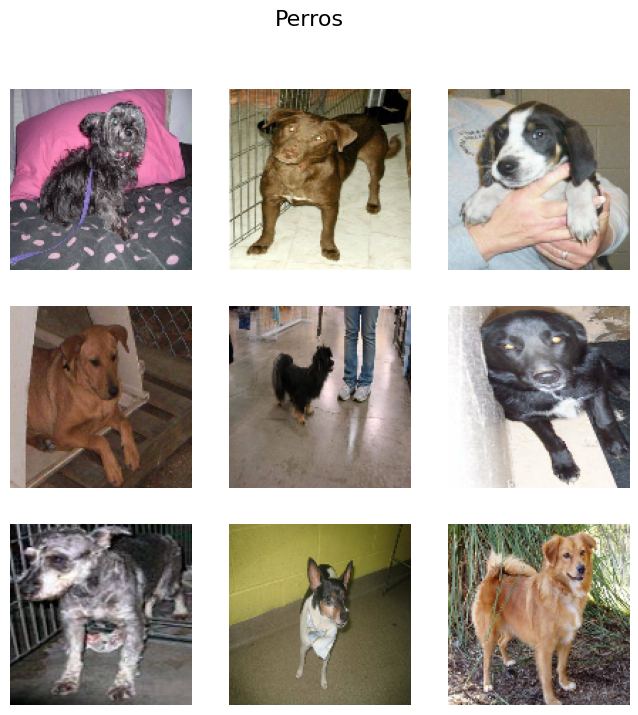

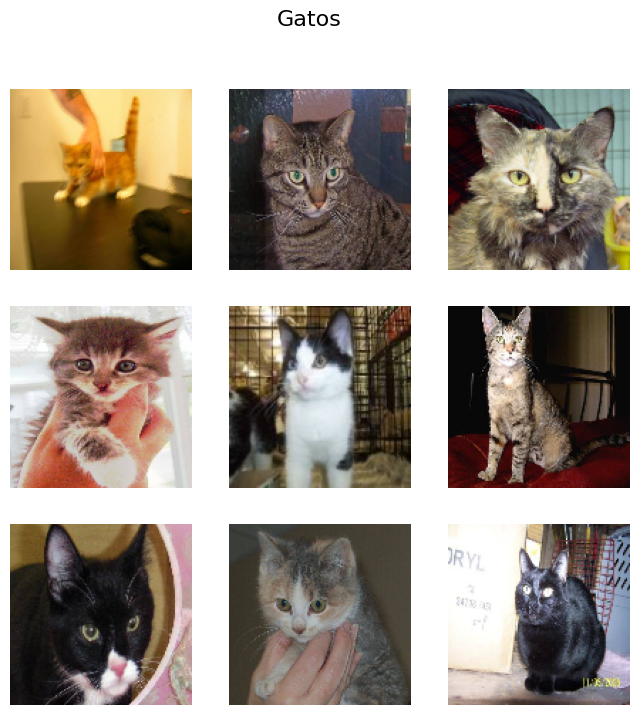

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

# Obtener el directorio actual y la ruta de las imágenes
current_dir = os.getcwd()
files_path = os.path.join(current_dir, "../data/raw/train")
files_path_test = os.path.join(current_dir, "../data/raw/test1/unknown")

dogs_path = os.path.join(files_path, "dogs")
cats_path = os.path.join(files_path, "cats")
# Obtener lista de archivos en la carpeta
files_dogs = os.listdir(dogs_path)
files_cats = os.listdir(cats_path)

# Filtrar imágenes de perros y gatos según el nombre del archivo
images_dogs = [f for f in files_dogs if ("dog" in f) and f.endswith(".jpg")]
images_cats = [f for f in files_cats if ("cat" in f) and f.endswith(".jpg")]

# Definir tamaño de redimensionamiento
tamaño = (128, 128)

# Función para cargar y procesar imágenes
def load_images(file_path, images_list, num_images=9):
    images = []
    for img in images_list[:num_images]:  # Tomar las primeras `num_images`
        complete_path = os.path.join(file_path, img)
        img = cv2.imread(complete_path)  # Leer imagen
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB
        img = cv2.resize(img, tamaño)  # Redimensionar antes de entrenar al modelo
        images.append(img)
    return images

# Función para obtener la etiqueta (basada en el nombre del archivo).
def get_tags(nombre_archivo):
    if "dog" in nombre_archivo:
        return 0  # Perro
    elif "cat" in nombre_archivo:
        return 1  # Gato
    return -1  # Si no es un archivo válido

# Cargar imágenes de perros y gatos
images_dogs = load_images(dogs_path, images_dogs)  # inicialmente con num_images=9 pero cuando esté todo habrá que cambiarlo al len(images_dogs)
images_cats = load_images(cats_path, images_cats)    # inicialmente con num_images=9 pero cuando esté todo habrá que cambiarlo al len(images_cats)

# Función para mostrar imágenes en una cuadrícula 3x3
def show_images(images, titulo):
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Crear figura de 3x3
    fig.suptitle(titulo, fontsize=16)
    
    for i, ax in enumerate(axes.flat): # axes.flat es un atributo de numpy.ndarray, se usa como iterador del array
        ax.imshow(images[i])  # Mostrar imagen
        ax.axis("off")  # Ocultar ejes
    
    plt.show()

# Mostrar imágenes de perros y gatos
show_images(images_dogs, "Perros")
show_images(images_cats, "Gatos")



- Definición de un modelo de CNN con Keras
- Separar el modelo en diferentes partes para analizar la extracción de características

In [ ]:
# APUNTES 
# # Documentacion: https://keras.io/api/models/model/
# import tensorflow as tf
# from tensorflow import keras

# # Paso 1. Definición de la entrada:  Define la entrada de la red
# inputs = keras.Input(shape=(128, 128, 3))

# # Paso 2. Recorte Aleatorio:  Toma una porción aleatoria de la imagen de tamaño 64x64 píxeles
# processed = keras.layers.RandomCrop(width=64, height=64)(inputs)

# # Paso 3. Capa Convolucional: Aplica una convolución con 32 filtros y tamaño de kernel 3x3
# conv = keras.layers.Conv2D(filters=32, kernel_size=3)(processed)

# # Paso 4. Pooling Global: Reduce cada filtro a un único valor promedio.
# pooling = keras.layers.GlobalAveragePooling2D()(conv)

# # Paso 5: Capa Densa: Conecta las características extraídas con una capa densa de 10 neuronas.
# feature = keras.layers.Dense(10)(pooling)

# # Paso 6: Definir Modelos
# full_model = keras.Model(inputs, feature) # modelo completo: entrenar una red neuronal completa
# backbone = keras.Model(processed, conv) # modelo intermedio: extraer características
# activations = keras.Model(conv, feature) # otro modelo intermedio: mapea desde conv hasta feature. analizar activaciones de la red


#### Preparar las imágenes

In [6]:
# import numpy as np

# # Convertir listas de imágenes a arreglos numpy y normalizar
# images_dogs = np.array(images_dogs, dtype="float32") / 255.0
# images_cats = np.array(images_cats, dtype="float32") / 255.0

#### Obtener las características con full_model

In [7]:
# # Obtener características para perros
# characteristics_dogs = full_model.predict(images_dogs)

# # Obtener características para gatos
# characteristics_cats = full_model.predict(images_cats)


#### Mostrar características extraídas

In [8]:
# print("Características de la primera imagen de perro:", characteristics_dogs[0]) # inicialmente lo hago con 9 fotos 
# print("Características de la primera imagen de gato:", characteristics_cats[0]) # inicialmente lo hago con 9 fotos 


1. Cargar las imágenes usando load_img o ImageDataGenerator.

2. Cambiar el tamaño de las imágenes a 128x128 píxeles.

3. Asignar etiquetas basadas en los nombres de archivo (por ejemplo, si el nombre contiene "dog" o "cat").

4. Guardar las imágenes y etiquetas como una tupla.

In [9]:
files_path

'c:\\Users\\mamen\\OneDrive\\Documentos\\GitHub\\deep-learning-image-classifier\\src\\../data/raw/train'

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json

# Definir generadores de datos con aumentación
train_datagen = ImageDataGenerator(
                rescale=1./255,
                validation_split=0.2  # Usa el 20% de los datos para validación
                )
test_datagen = ImageDataGenerator(rescale=1./255)

# Cargar imágenes desde directorios
train_generator = train_datagen.flow_from_directory(
    files_path,
    target_size=(128, 128), # reescalar la imagen antes de pasarlo al modelo
    batch_size=32,
    class_mode='binary',  # Para clasificación binaria (perros y gatos)
    subset="training"
)
# Generador de validación (automático)
validation_generator = train_datagen.flow_from_directory(
    files_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset="validation"
)

test_images = os.listdir(files_path_test)

# Crear un DataFrame con las rutas de las imágenes
test_df = pd.DataFrame({
    "filename": test_images  # Solo los nombres de los archivos
})
# Ver el DataFrame para confirmar
print(test_df.head()) 
# test_generator = test_datagen.flow_from_directory(
#     files_path_test,
#     target_size=(150, 150),
#     batch_size=32,
#     class_mode='binary'
# )
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=files_path_test,
    x_col="filename",
    target_size=(128, 128), # reescalar la imagen antes de pasarlo al modelo
    batch_size=64,
    class_mode=None,  # No tiene etiquetas, solo queremos predecir
    shuffle=False  # Importante para que mantenga el orden
)
trdata = train_generator
tsdata = test_generator
# Ver las clases asignadas automáticamente
print(train_generator.class_indices)  # {'cats': 0, 'dogs': 1}

print(f"Total de imágenes en test_df: {len(test_df)}")

base_path = os.getcwd()
# guardar la factorización/transformación
factor_path = "../models/transformation_rules.json"
complete_path = os.path.join(base_path, factor_path)
with open(os.path.join(current_dir,factor_path), "w") as f:
    json.dump(train_generator.class_indices, f)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
    filename
0      1.jpg
1     10.jpg
2    100.jpg
3   1000.jpg
4  10000.jpg
Found 12500 validated image filenames.
{'cats': 0, 'dogs': 1}
Total de imágenes en test_df: 12500


In [11]:
# import tensorflow as tf

# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# print(tf.__version__)




# # Lista de archivos
# files = os.listdir(files_path)
# # Variables para almacenar imágenes y etiquetas
# imagenes = []
# etiquetas = []
# for f in files:
#     if f.endswith(".jpg"):
#         # obtener ruta de la imagen
#         complete_path_file = os.path.join(files_path, f)
#         # Cargar la imagen con la librería de Keras
#         imagen = load_img(complete_path_file, target_size=tamaño)  # Redimensionar a 128x128
        
#         # Convertir la imagen a un array de NumPy
#         imagen_array = img_to_array(imagen)
        
#         # Normalizar la imagen (si es necesario)
#         imagen_array = imagen_array / 255.0  # Escala entre 0 y 1
        
#         # Obtener la etiqueta del archivo
#         etiqueta = get_tags(f)
        
#         # Almacenar la imagen y la etiqueta
#         imagenes.append(imagen_array)
#         etiquetas.append(etiqueta)
# # Convertir las listas a arrays de NumPy
# imagenes = np.array(imagenes)
# etiquetas = np.array(etiquetas)

# # Verifica el tamaño de los datos cargados
# print(f"Total de imágenes cargadas: {imagenes.shape[0]}")
# print(f"Dimensiones de las imágenes: {imagenes.shape[1:]}")
# print(f"Etiquetas: {etiquetas[:10]}")  # Muestra las primeras 10 etiquetas


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from pickle import dump
model = Sequential()

# Ajustamos el input_shape a (128, 128, 3)
model.add(Conv2D(input_shape=(128, 128, 3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))  #  sigmoid: solo 1 salida para clasificación binaria

# Mostrar resumen del modelo
model.summary()

base_path = os.getcwd()
# guardar el modelo
# 64 filtros en el primer bloque convolucional (C1)
# 128 en el segundo (C2)
# 256 en el tercero (C3)
# 512 en el cuarto (C4)
# 512 en el quinto (C5)
# 4096 neuronas en la primera capa densa (D1)
# 4096 neuronas en la segunda capa densa (D2)
# 1 neurona de salida tipo sigmoide (clasificación binaria)
model_path = "../models/deep_learning_VGG16_default_64C1_128C2_256C3_512C4_512C5_4096D1_4096D2_OUT1.pkl"
complete_path = os.path.join(base_path, model_path)
dump(model, open(complete_path, "wb"))
model.save(complete_path.replace(".pkl", ".h5"))


c:\Users\mamen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,058,625 (248.18 MB)

 Trainable params: 65,058,625 (248.18 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.optimizers import Adam
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



In [14]:
# Sin validación
# inicialmente train_datagen no tenía la partición de datos 0.2
# ni el validation_generator
# history = model.fit(
#     trdata,
#     epochs=1,               # Ajustar según el rendimiento del pc. 3,74h por epoch
#     batch_size=32,          # Ya está definido en ImageDataGenerator
#     verbose=1
# )

# Con validación: Reduzco el numero de epochs a uno para tener el funcionamiento, pero debería de ser más
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_model = os.path.join(current_dir,"../models/best_model.h5")
# Guardar el mejor modelo según la métrica de validación
checkpoint = ModelCheckpoint(
    save_model,        # Nombre del archivo guardado
    monitor="val_loss",     # Métrica a observar val_accuracy, val_loss
    save_best_only=True,    # Solo guarda el mejor modelo
    mode="min",             # Queremos maximizar val_accuracy -> max, val_loss -> min
    verbose=1
)

# Detener el entrenamiento si no hay mejora en 'val_loss' después de 5 epochs
early_stopping = EarlyStopping(
    monitor="val_loss",     # Métrica a observar val_accuracy, val_loss
    patience=5,                 # Número de epochs sin mejora antes de detener
    restore_best_weights=True,  # Restaurar los mejores pesos del modelo
    verbose=1
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=3,           # Número máximo de epochs. Mínimo deberían de ser 5-20, pero con mi ordenador sería 15h - 60h

    callbacks=[checkpoint, early_stopping],  # Lista de callbacks
    verbose=1
)



c:\Users\mamen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5036 - loss: 0.6928 
Epoch 1: val_loss improved from inf to 0.69315, saving model to c:\Users\mamen\OneDrive\Documentos\GitHub\deep-learning-image-classifier\src\../models/best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 6934s 11s/step - accuracy: 0.5036 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.4905 - loss: 0.6932 
Epoch 2: val_loss did not improve from 0.69315
625/625 ━━━━━━━━━━━━━━━━━━━━ 6826s 11s/step - accuracy: 0.4905 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5014 - loss: 0.6932 
Epoch 3: val_loss did not improve from 0.69315
625/625 ━━━━━━━━━━━━━━━━━━━━ 6773s 11s/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Restoring model weights from the end of the best epoch: 1.


In [15]:
# Hacer predicciones en test/unknown/
predictions = model.predict(tsdata)

# Convertir predicciones a etiquetas (0 = perro, 1 = gato)
predictions = (predictions > 0.5).astype(int)

# Ver los resultados
for filename, pred in zip(test_df["filename"], predictions):
    label = "Cat" if pred == 1 else "Dog"
    print(f"{filename}: {label}")

196/196 ━━━━━━━━━━━━━━━━━━━━ 1055s 5s/step
1.jpg: Dog
10.jpg: Dog
100.jpg: Dog
1000.jpg: Dog
10000.jpg: Dog
10001.jpg: Dog
10002.jpg: Dog
10003.jpg: Dog
10004.jpg: Dog
10005.jpg: Dog
10006.jpg: Dog
10007.jpg: Dog
10008.jpg: Dog
10009.jpg: Dog
1001.jpg: Dog
10010.jpg: Dog
10011.jpg: Dog
10012.jpg: Dog
10013.jpg: Dog
10014.jpg: Dog
10015.jpg: Dog
10016.jpg: Dog
10017.jpg: Dog
10018.jpg: Dog
10019.jpg: Dog
1002.jpg: Dog
10020.jpg: Dog
10021.jpg: Dog
10022.jpg: Dog
10023.jpg: Dog
10024.jpg: Dog
10025.jpg: Dog
10026.jpg: Dog
10027.jpg: Dog
10028.jpg: Dog
10029.jpg: Dog
1003.jpg: Dog
10030.jpg: Dog
10031.jpg: Dog
10032.jpg: Dog
10033.jpg: Dog
10034.jpg: Dog
10035.jpg: Dog
10036.jpg: Dog
10037.jpg: Dog
10038.jpg: Dog
10039.jpg: Dog
1004.jpg: Dog
10040.jpg: Dog
10041.jpg: Dog
10042.jpg: Dog
10043.jpg: Dog
10044.jpg: Dog
10045.jpg: Dog
10046.jpg: Dog
10047.jpg: Dog
10048.jpg: Dog
10049.jpg: Dog
1005.jpg: Dog
10050.jpg: Dog
10051.jpg: Dog
10052.jpg: Dog
10053.jpg: Dog
10054.jpg: Dog
10055.jpg: D

In [1]:
# Crear un DataFrame con las predicciones
pred_df = pd.DataFrame(predictions, columns=["prediction"])

# Si tienes los nombres de las imágenes, puedes incluirlos también
file_names = tsdata.filenames
pred_df["filename"] = file_names

processed_path = os.path.join(current_dir, "../data/processed/predictions.csv")
# Guardar las predicciones en un archivo CSV
pred_df.to_csv(processed_path, index=False)


KeyboardInterrupt



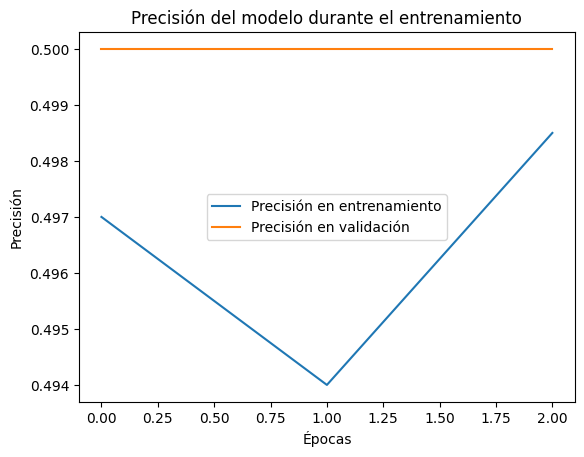

In [17]:
import matplotlib.pyplot as plt

# Historial de entrenamiento
plt.plot(history.history["accuracy"], label="Precisión en entrenamiento")
plt.plot(history.history["val_accuracy"], label="Precisión en validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.title("Precisión del modelo durante el entrenamiento")
plt.show()


In [18]:
pred_df.describe()

,prediction
count,12500.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0
